<b><font size="6">|023|Clustering|KMC|Mall Customer Segmentation</font></b>

**Key Concepts:**
* Scatter Plots
* k-Means Clustering
* Elbow Method

In [616]:
# This is required to prevent warning from k-means in scikit-learn
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [617]:
import numpy as np
import pandas as pd

from IPython.display import display 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer

# Load data

In [618]:
df = pd.read_csv('Mall_Customers.csv')

# Inspecting the data

## Viewing some rows

In [619]:
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Drop the CustomerID column.

In [620]:
df.drop("CustomerID", axis = "columns", inplace=True)

In [621]:
display(df.head())

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Summary of what was imported

We can summarise the DataFrame that was imported using the **df.info()** method.

In [622]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


None

## Convert Gender to numeric values


Get the solution from Gemini with the prompt:

*I have a pandas dataframe with a column "Gender" containing "Male" and "Female". I would like to convert to a numeric integer value, with 1 corresponding to "Female" and "0" corresponding to "Male". I want to create a new column "GenderCode", and then delete the "Gender" column. Can you use the pandas map method?*

In [623]:
for n , g in enumerate(df["Gender"].unique()):#m2
    print(n, g)

0 Male
1 Female


In [624]:
#{g:n for n, g in enumerate(df["Gender"].unique())}

In [625]:
gender_map = {g:n for n, g in enumerate(df["Gender"].unique())} #m2

In [626]:
# Create a dictionary mapping genders to numeric codes
#gender_map = {'Male': 0, 'Female': 1} #another method

# Apply the map to create a new 'GenderCode' column
df['GenderCode'] = df['Gender'].map(gender_map)

# Drop the original 'Gender' column
df = df.drop('Gender', axis=1)

display(df)

,Age,Annual Income (k$),Spending Score (1-100),GenderCode
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


# Exploratory Data Analysis

## Histogram Plots

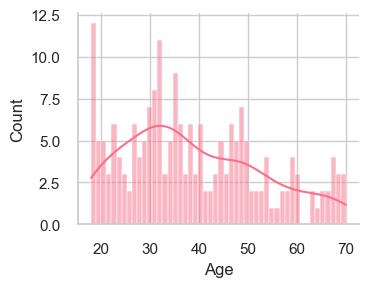

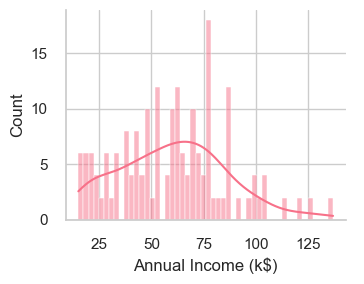

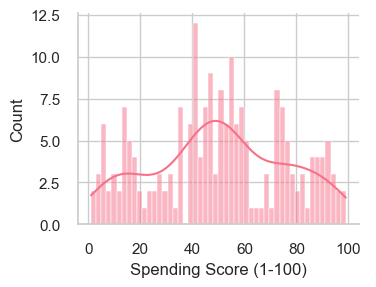

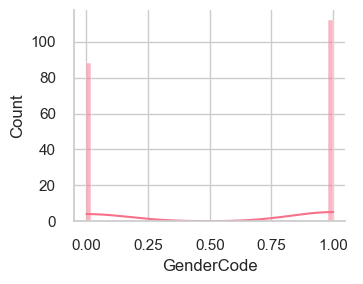

In [627]:
for x in df.columns:
    sns.FacetGrid(df, aspect=1.2).map(sns.histplot,x, bins=50, kde=True).add_legend()

## Scatter Plots

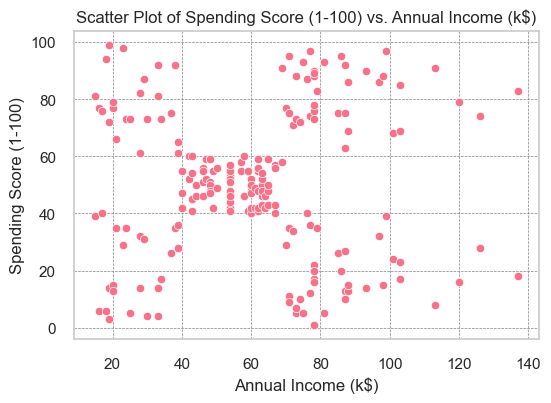

In [628]:
plt.figure(figsize=(6, 4))  #
sns.scatterplot(data=df, y="Spending Score (1-100)", x="Annual Income (k$)")

# Add labels and title 
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.title("Scatter Plot of Spending Score (1-100) vs. Annual Income (k$)")

# Show the plot
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Add gridlines for better readability (optional)
plt.show()

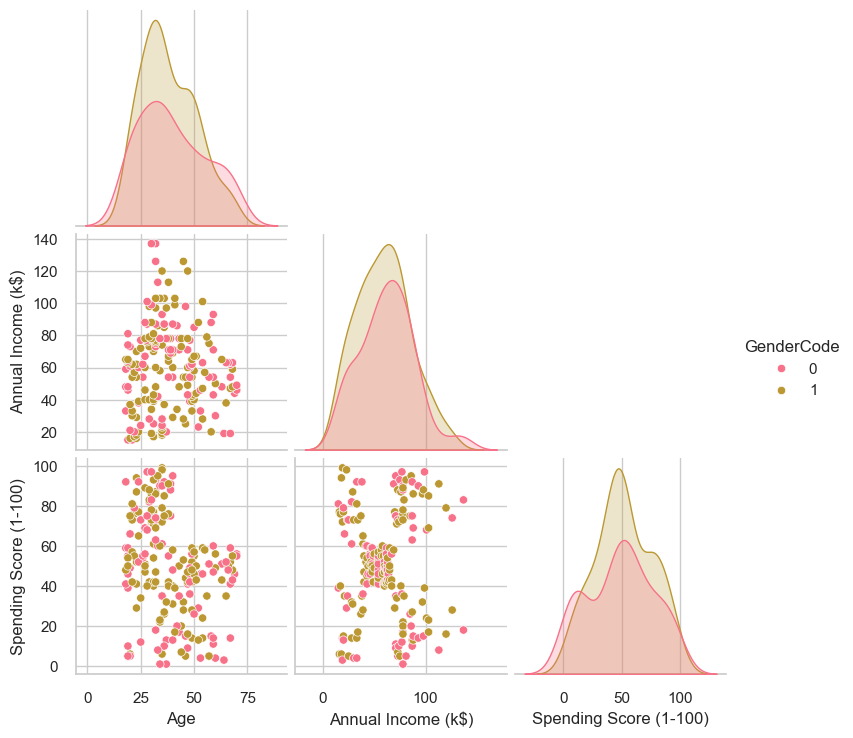

In [629]:

_ = sns.pairplot(data = df, hue='GenderCode', corner= True, kind='scatter')

In [630]:
#sns.pairplot(data = df, kind='scatter')

Simply by looking at the scatter plot, we can see that there are 3 obvious clusters.

## Determining Clusters

### Scatter Plots

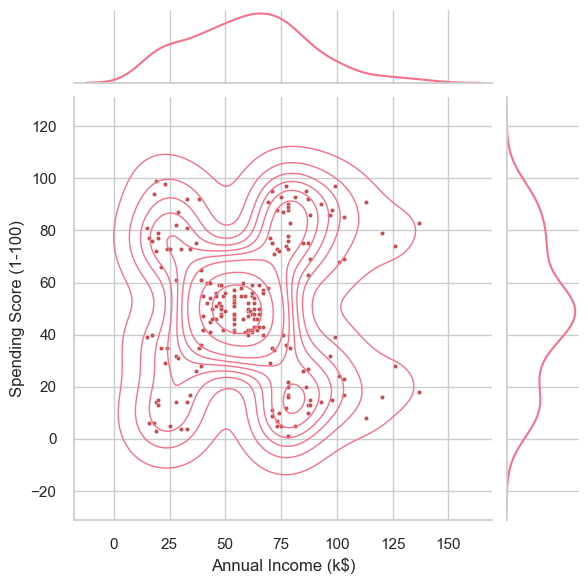

In [631]:
ax = sns.jointplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", kind="kde", levels=10, linewidths=1)
_ = sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", color = 'r', s=10)



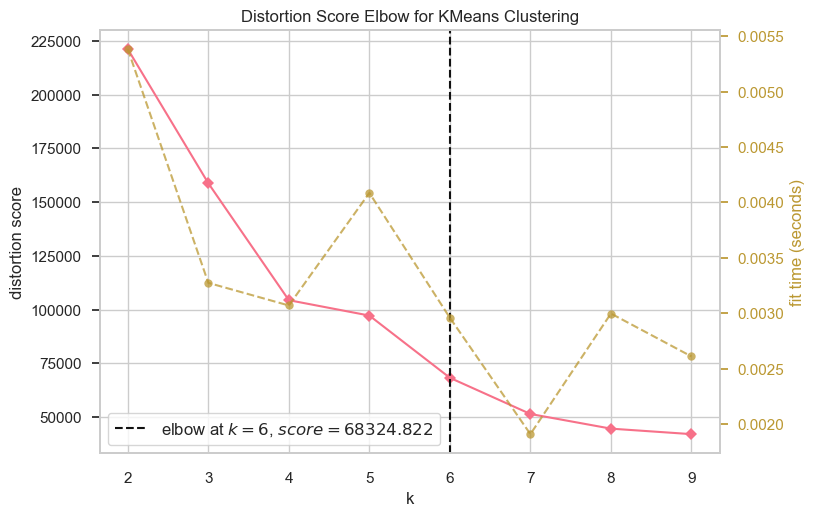

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [767]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)  # Set seed to make it deterministic
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()


### Elbow Curve

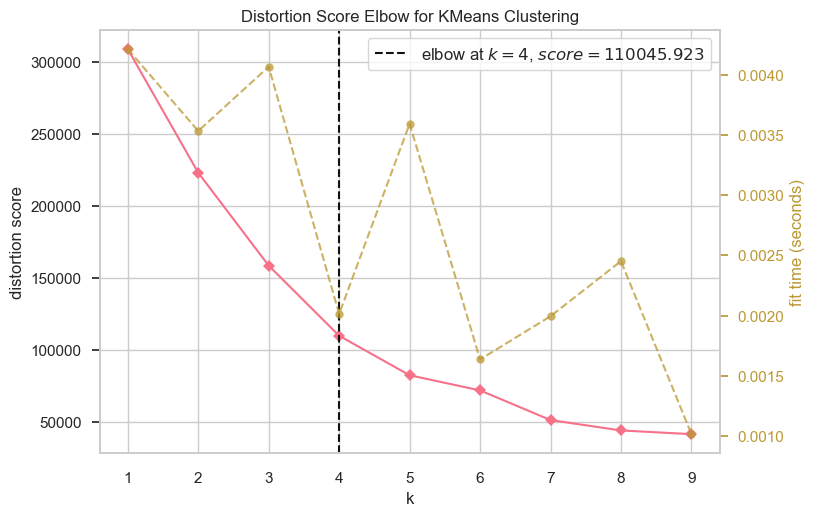

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [768]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

The elbow method indicates that there should be 5 clusters, confirming what we saw with the scatter plot.

# Model

In [769]:
k = 5
kmeans = KMeans(n_clusters=k)

clusters = kmeans.fit_predict(df)

df_clusters = df.copy()
df_clusters.insert(0,"Cluster", clusters)

# Evaluate Model

## Scatter Plot

In [770]:
palette = sns.color_palette(palette='Set1')[0:k]

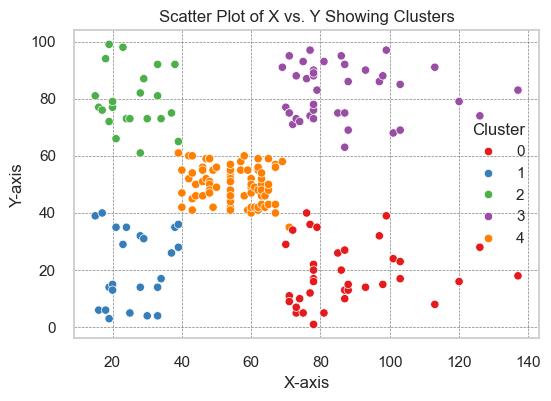

In [771]:
plt.figure(figsize=(6, 4))  #

sns.scatterplot(data=df_clusters, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette=palette)
sns.color_palette(palette='Set1')
# Add labels and title 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of X vs. Y Showing Clusters")

# Show the plot
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Add gridlines for better readability (optional)
plt.show()

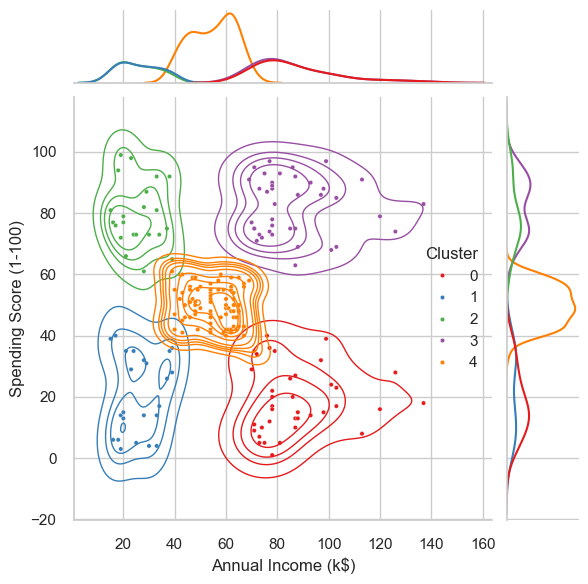

In [772]:
ax = sns.jointplot(data=df_clusters, x="Annual Income (k$)", y="Spending Score (1-100)", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
_ = sns.scatterplot(data=df_clusters, x="Annual Income (k$)", y="Spending Score (1-100)", hue = "Cluster", palette=palette, s=10)


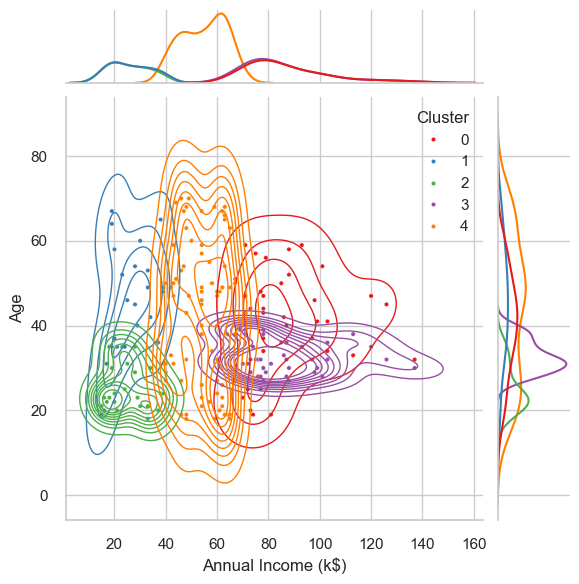

In [773]:
ax = sns.jointplot(data=df_clusters, x="Annual Income (k$)", y="Age", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
_ = sns.scatterplot(data=df_clusters, x="Annual Income (k$)", y="Age", hue = "Cluster", palette=palette, s=10)

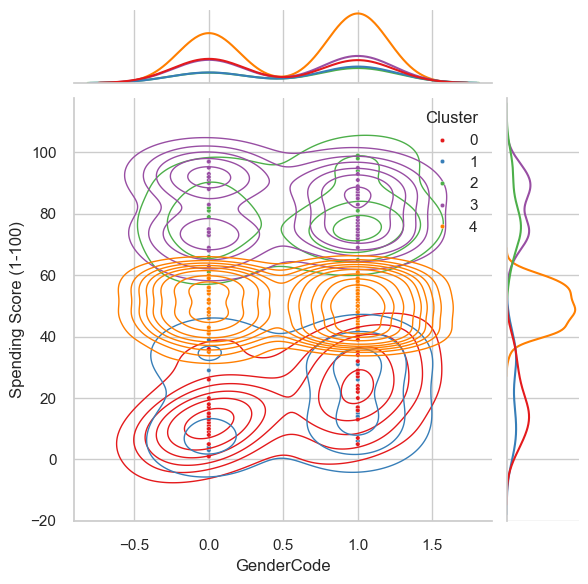

In [774]:
ax = sns.jointplot(data=df_clusters, x="GenderCode", y="Spending Score (1-100)", kind="kde", hue = "Cluster", levels=10, linewidths=1, palette=palette)
_ = sns.scatterplot(data=df_clusters, x="GenderCode", y="Spending Score (1-100)", hue = "Cluster", palette=palette, s=10)



## Statistical Analysis

In [775]:
for no in np.sort(df_clusters["Cluster"].unique()):
    data = df_clusters[df_clusters["Cluster"]==no].drop("Cluster", axis='columns')
    print(f'CLUSTER {no}:')
    print(f'{data.mean()}')
    print('\n')

CLUSTER 0:
Age                       40.324324
Annual Income (k$)        87.432432
Spending Score (1-100)    18.189189
GenderCode                 0.486486
dtype: float64


CLUSTER 1:
Age                       45.217391
Annual Income (k$)        26.304348
Spending Score (1-100)    20.913043
GenderCode                 0.608696
dtype: float64


CLUSTER 2:
Age                       25.272727
Annual Income (k$)        25.727273
Spending Score (1-100)    79.363636
GenderCode                 0.590909
dtype: float64


CLUSTER 3:
Age                       32.692308
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
GenderCode                 0.538462
dtype: float64


CLUSTER 4:
Age                       43.126582
Annual Income (k$)        54.822785
Spending Score (1-100)    49.835443
GenderCode                 0.582278
dtype: float64




In [776]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0
GenderCode,200.0,0.56,0.497633,0.0,0.00,1.0,1.0,1.0


## Cluster Identification

**Correct this:**

In [777]:
# Create a dictionary Clusters to Codes
cluster_map = {0: "High Income Middle Aged Men", 
               1: "High Income Youth Women", 
               2: "Middle Income Middle-Aged Women", 
               3: "Low Income Middle-Aged Women", 
               4: "Low Income Young Women", }

# Apply the map to create a new 'Cluster Label' column
df_clusters['Cluster Label'] = df_clusters['Cluster'].map(cluster_map)


display(df_clusters.head())

,Cluster,Age,Annual Income (k$),Spending Score (1-100),GenderCode,Cluster Label
0,1,19,15,39,0,High Income Youth Women
1,2,21,15,81,0,Middle Income Middle-Aged Women
2,1,20,16,6,1,High Income Youth Women
3,2,23,16,77,1,Middle Income Middle-Aged Women
4,1,31,17,40,1,High Income Youth Women


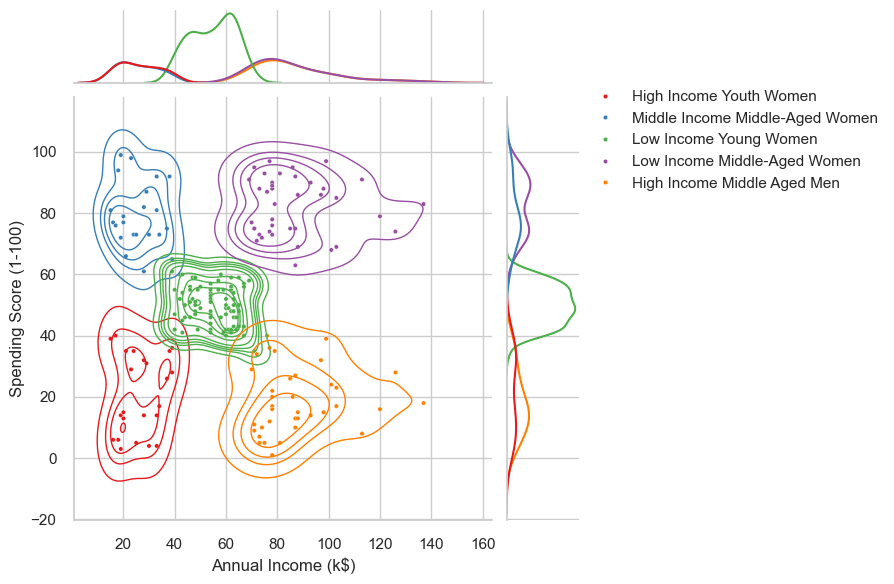

In [778]:
g = sns.jointplot(data=df_clusters, 
                  x="Annual Income (k$)", 
                  y="Spending Score (1-100)", 
                  kind="kde", 
                  hue = "Cluster Label", 
                  levels=10, linewidths=1, palette=palette)

_ = sns.scatterplot(data=df_clusters, 
                    x="Annual Income (k$)", 
                    y="Spending Score (1-100)", 
                    hue = "Cluster Label", 
                    palette=palette, s=10)
plt.legend(bbox_to_anchor=(1.2, 1.05))
plt.show()

In [779]:
g.ax_joint.legend

<bound method Axes.legend of <Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>>